In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
hojas = pd.ExcelFile('Internet.xlsx').sheet_names
hojas


['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por rango',
 'Accesos por rangos',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']


Totales Accesos por velocidad: Analiza cómo se distribuyen los accesos según la velocidad de conexión. Esto te ayudará a entender la calidad del servicio que los usuarios están recibiendo.

Penetración-poblacion y Penetracion-hogares: Estas hojas son cruciales para comprender cómo el acceso a internet está penetrando tanto en la población general como en los hogares. Esto te permitirá ver el impacto del internet en la sociedad.

Ingresos: Examina los ingresos generados por los servicios de internet para tener una idea de la rentabilidad y el impacto económico.

Accesos_tecnologia_localidad: Después de obtener la visión general, esta hoja te permitirá profundizar en los detalles sobre cómo se distribuyen los accesos por tecnología en distintas localidades.

Velocidad_sin_Rangos y Velocidad % por prov: Estas hojas te ayudarán a entender mejor la distribución y el rendimiento de la velocidad de conexión en diferentes áreas.

Este orden te permitirá construir un entendimiento sólido y progresivo del estado actual de los accesos a internet y sus implicaciones, desde una perspectiva general hasta detalles más específicos.

## Base de datos : Internet

### Total Accesos por Tecnología: 

In [8]:
df_accesos = pd.read_excel('Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
df_accesos.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


Quiero hacer una gráfica de la cantidad de conexiones a internet existentes, para identificar las tendencias en el uso de los diferentes tipos de tecnologias existentes. Esto para obtener una visión general de cómo están distribuidos los accesos a internet según la tecnología, con el fin de tener una base sólida sobre el panorama tecnológico.

<Figure size 1200x600 with 0 Axes>

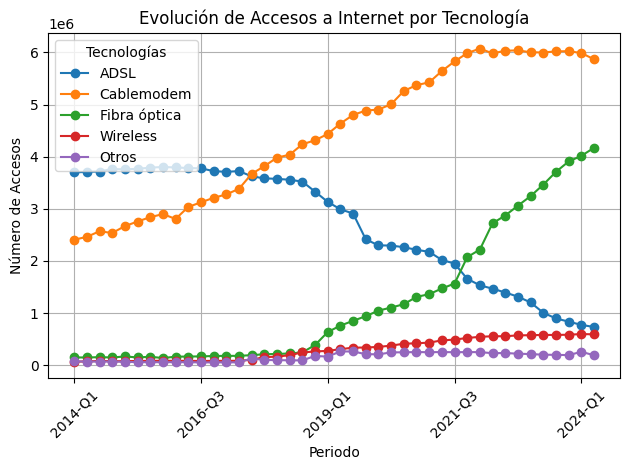

In [7]:
df_accesos['Periodo'] = df_accesos['Año'].astype(str) + '-Q' + df_accesos['Trimestre'].astype(str) #Periodo en indice
df_accesos.sort_values(by=['Año', 'Trimestre'], inplace=True) #corregir orden cronologico
df_accesos.set_index('Periodo', inplace=True)
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Grafica
plt.figure(figsize=(12, 6))
df_accesos[tecnologias].plot(kind='line', marker='o')
plt.title('Evolución de Accesos a Internet por Tecnología')
plt.xlabel('Periodo')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=45)
plt.legend(title='Tecnologías')
plt.grid(True)
plt.tight_layout()
plt.show()


Se puede observar que en un intervalo de los ultimos 10 años ha habido un incremento considerable en el uso de los siguientes: 
1. *"Cablemodem"* el cual ya existia en 2014. Este, en esta epoca alcanzaba los 2.4 millones de conexiones y para 2024 alcanzo las 5.8 millones de conexiones. 
2. *"Fibra optica"* no existia en 2014 y a alcanzado un total de conexiones de 4.1 millones, es el que ha tenido el crecimiento más representativo. 

Por otro lado, el uso de la tecnologia *"ADSL"* se ha reducido considerablemente. Ha pasado de tener 3.7 millones de conexiones en promedio de 2014 a solo un promedio de 753 mil en 2024. El uso de "Wireles" y "Otros" no es representativo. 

### Total Velocidad por Provincia: 

In [29]:
df_velocidad = pd.read_excel('Internet.xlsx', sheet_name='Velocidad % por prov')
df_velocidad.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


#### Comportamiento de la velocidad, periodos trimestrales.

In [27]:
df_total_trimestre_anio = df_velocidad.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].sum().reset_index()
df_total_trimestre_anio.rename(columns={'Mbps (Media de bajada)': 'Total Mbps'}, inplace=True)
df_promedio_trimestre_anio = df_velocidad.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].mean().reset_index()
df_promedio_trimestre_anio.rename(columns={'Mbps (Media de bajada)': 'Promedio Mbps'}, inplace=True)
df_trimestre_anio = pd.merge(df_total_trimestre_anio, df_promedio_trimestre_anio, on=['Año', 'Trimestre'])
df_trimestre_anio.head()


,Año,Trimestre,Total Mbps,Promedio Mbps
0,2014,1,77.790826,3.241284
1,2014,2,80.055265,3.335636
2,2014,3,81.212936,3.383872
3,2014,4,87.321740,3.638406
4,2015,1,93.040200,3.876675


In [28]:
df_trimestre_anio.tail()

,Año,Trimestre,Total Mbps,Promedio Mbps
37,2023,2,1825.01,76.042083
38,2023,3,1886.63,78.609583
39,2023,4,2045.00,85.208333
40,2024,1,2064.85,86.035417
41,2024,2,2102.10,87.587500


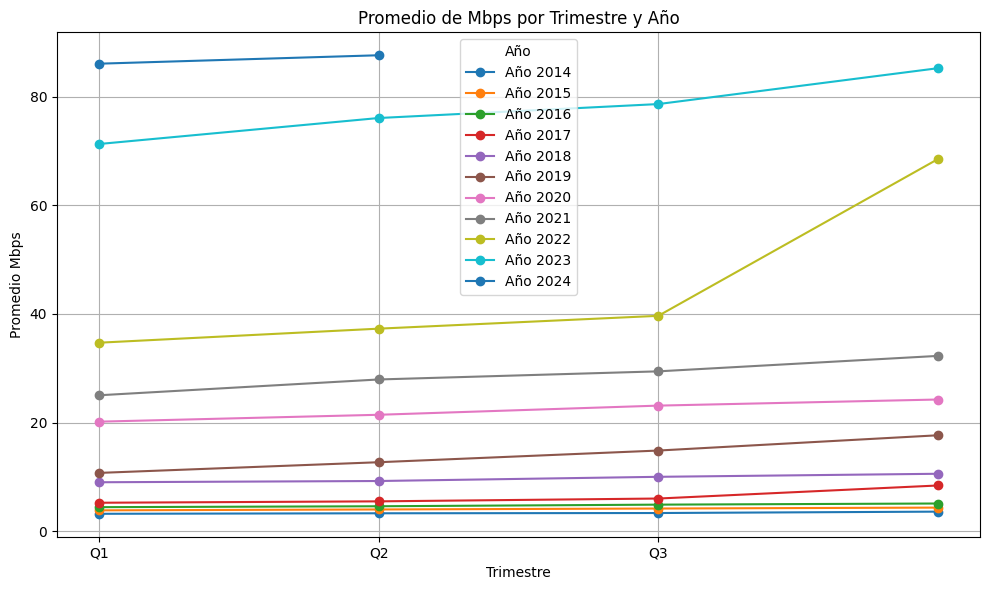

In [25]:
plt.figure(figsize=(10, 6))
for año in df_trimestre_anio['Año'].unique():
    df_año = df_trimestre_anio[df_trimestre_anio['Año'] == año]
    plt.plot(df_año['Trimestre'], df_año['Promedio Mbps'], marker='o', linestyle='-', label=f'Año {año}')

# Grafica
plt.title('Promedio de Mbps por Trimestre y Año')
plt.xlabel('Trimestre')
plt.ylabel('Promedio Mbps')
plt.xticks([1, 2, 3], ['Q1', 'Q2', 'Q3'])  # Etiquetas para trimestres
plt.legend(title="Año")
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede observar que la velovidad promedio ha mejorado continuamente en la decada de estudio. El grafico generado es muy interesante porque se pueden ver los saltos en cada trimestre de cada año. Se puede observar que a medida que pasa el tiempo la velocidad de bajada siempre ha mejorado, no ha habido un solo año en el que haya habido un retroceso. En 2014 la velocidad de bajada promedio fue de 3.24 Mpbs, mientras que en 2022 alcanzó los 87.58 Mbps. 

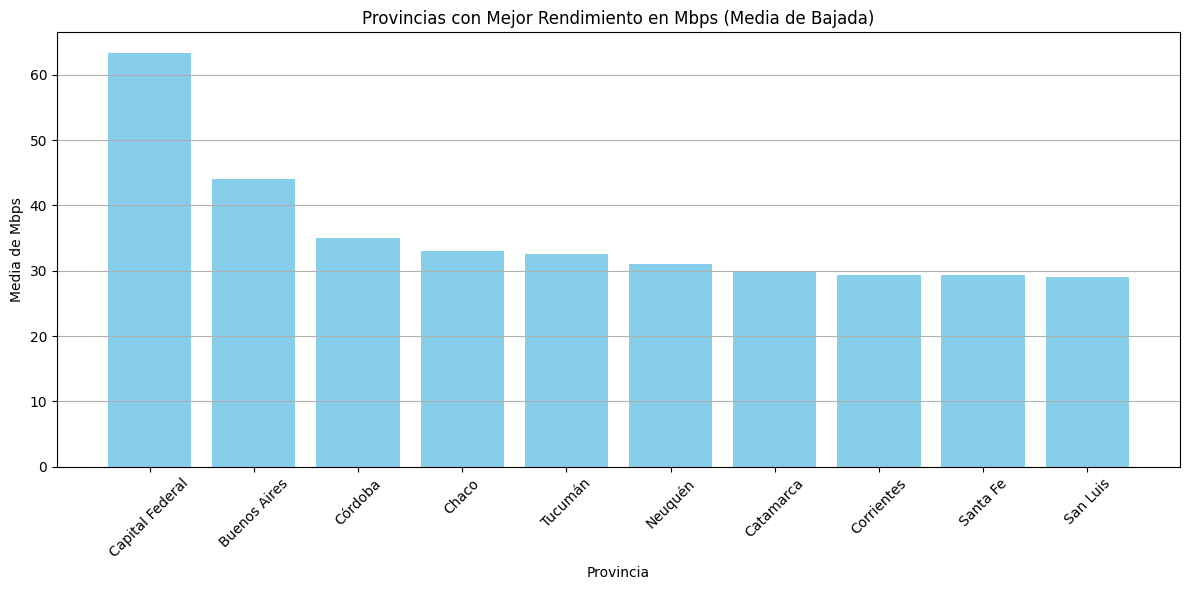

In [20]:
df_prov_rendimiento = df_velocidad.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()
df_prov_rendimiento = df_prov_rendimiento.sort_values(by='Mbps (Media de bajada)', ascending=False)
top_provincias = df_prov_rendimiento.head(10)

# Grafica
plt.figure(figsize=(12, 6))
plt.bar(top_provincias['Provincia'], top_provincias['Mbps (Media de bajada)'], color='skyblue')
plt.title('Provincias con Mejor Rendimiento en Mbps (Media de Bajada)')
plt.xlabel('Provincia')
plt.ylabel('Media de Mbps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Las provincias con mejor velocidad de internet fueron: Capital Federal, Buenos Aires, Cordoba, Chaco, Tucumán, Neuquen, Catamarca, Corrientes, Santa Fe y San Luis, en orden descendente. 